# Librerías

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Google Colab o Local

In [2]:
# Verificamos si estamos en Colab
var_google_colab = 'google.colab' in str(get_ipython())
print(var_google_colab)
if var_google_colab:
  #Montamos nuestro G.Drive
  from google.colab import drive
  drive.mount('/content/gdrive',force_remount=True)
  # Direccion root donde está la jupyter-notebook
  root_path = "/content/gdrive/My Drive/ciencia_de_datos_2022_german_maestri"
  # Direccion donde guardaremos las imagenes
  plot_path = root_path
else:
  # Si, no estamos en google colab, es que estamos corriendo la en local
  root_path = ""
  plot_path = root_path

# Cargamos el dataset

if var_google_colab:
    bank_subscription_df = pd.read_csv(root_path + "/bank_subscription.csv")
else:
    bank_subscription_df = pd.read_csv(root_path + "bank_subscription.csv")

False


# 1. Entendamos y limpiemos los datos


| **Variable**          | **Significado**                                                                                                                    |
|-----------------------|------------------------------------------------------------------------------------------------------------------------------------|
| age                   | Edad del cliente                                                                                                                   |
| job                   | Tipo de empleo del cliente                                                                                                         |
| martial status        | Estado civil                                                                                                                       |
| education             | Educacion maxima alcanzada por el cliente                                                                                          |
| Credit                | Si tiene deuda de crédito o no                                                                                                     |
| balance               | Promedio de saldo en la cuenta en el anio                                                                                          |
| housing loan          | Si tiene seguro de hogar o no                                                                                                      |
| Persona loan          | Si tiene prestamos o no                                                                                                            |
| contact               | tipo con contacto del cliente                                                                                                      |
| Last Contact Day      | Ultimo dia de contacto con el cliente en el mes                                                                                    |
| Last Contact Month    | Ultimo mes de contacto con el cliente en el anio                                                                                   |
| Last Contact Duration | Duracion del ultimo contacto con el cliente medido en segundos                                                                     |
| campaign              | Cantidad de contactos al cliente durante esta campania, incluye el último contacto.                                                |
| pdays                 | Cantidad de dias que pasaron del último contacto con el cliente de una campania anterior. -1 significa que no hubo contacto previo |
| previous              | Cantidad de contactos previos a esta campania para cada cliente                                                                    |
| poutcome              | Performance de la campania de marketing anterior para este cliente                                                                 |
| Subscription          | Si el cliente accede a la campania o no.                                                                                           |

In [3]:
# Investigamos el head y tail, para darnos una idea de la información con la que trabajaremos
bank_subscription_df.head()

,Unnamed: 0,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription
0,0,58.0,management,married,NaN,no,2143.0,yes,no,unknown,5,may,261.0,1,-1.0,0,unknown,1
1,1,44.0,technician,single,secondary,no,29.0,NaN,no,unknown,5,may,NaN,1,-1.0,0,unknown,1
2,2,NaN,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76.0,1,-1.0,0,unknown,1
3,3,47.0,blue-collar,married,unknown,no,NaN,yes,NaN,unknown,5,may,NaN,1,-1.0,0,unknown,1
4,4,NaN,unknown,single,unknown,NaN,1.0,no,no,unknown,5,may,NaN,1,-1.0,0,unknown,1


In [4]:
bank_subscription_df.tail()

,Unnamed: 0,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription
45206,45206,51.0,technician,NaN,tertiary,no,NaN,no,no,cellular,17,nov,977.0,3,-1.0,0,unknown,2
45207,45207,71.0,retired,NaN,primary,no,1729.0,no,no,cellular,17,nov,456.0,2,-1.0,0,unknown,2
45208,45208,72.0,NaN,married,secondary,no,5715.0,no,no,cellular,17,nov,1127.0,5,184.0,3,success,2
45209,45209,57.0,blue-collar,married,secondary,no,668.0,no,no,telephone,17,nov,508.0,4,-1.0,0,unknown,1
45210,45210,37.0,entrepreneur,married,secondary,no,2971.0,no,no,cellular,17,nov,361.0,2,NaN,11,other,1


In [5]:
# Chequeamos los tipos de variable, y si hay NULLs en el DF
bank_subscription_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             45211 non-null  int64  
 1   Age                    40238 non-null  float64
 2   Job                    40238 non-null  object 
 3   Marital Status         40238 non-null  object 
 4   Education              40238 non-null  object 
 5   Credit                 40238 non-null  object 
 6   Balance (euros)        40238 non-null  float64
 7   Housing Loan           37525 non-null  object 
 8   Personal Loan          37525 non-null  object 
 9   Contact                45211 non-null  object 
 10  Last Contact Day       45211 non-null  int64  
 11  Last Contact Month     45211 non-null  object 
 12  Last Contact Duration  37525 non-null  float64
 13  Campaign               45211 non-null  int64  
 14  Pdays                  37525 non-null  float64
 15  Pr

In [6]:
# Cantidad de NULLs por columna
bank_subscription_df.isnull().sum()

Unnamed: 0                  0
Age                      4973
Job                      4973
Marital Status           4973
Education                4973
Credit                   4973
Balance (euros)          4973
Housing Loan             7686
Personal Loan            7686
Contact                     0
Last Contact Day            0
Last Contact Month          0
Last Contact Duration    7686
Campaign                    0
Pdays                    7686
Previous                    0
Poutcome                    0
Subscription                0
dtype: int64

In [7]:
# Limpiamos duplicados si es que los hay, y nos quitamos de encima los NULLs
bank_subscription_df.drop_duplicates(inplace=True)
bank_subscription_df.dropna(inplace=True)

In [8]:
# Eliminamos la columna "Unnamed: 0" y renombramos columnas para facilidad de manipuleo

# Al observar la tabla, en la columna "pdays", representando la cantidad de días desde el último contacto,
# y "-1" en caso de no haber contacto, notamos que existe discrepancia en la información provista. Dado que
# se observa que hay varios valores en -1, pero que aún así se presenta información sobre un último contacto,
# como el día y mes, y duración de la llamada.
# Dado este escenario, se eliminará dicha columna.

bank_subscription_df.drop('Unnamed: 0', inplace=True, axis = 1)
bank_subscription_df.drop('Pdays', inplace=True, axis = 1)
bank_subscription_df.rename(columns = {'Age':'age', 'Job':'job', 'Marital Status':'marital_status', 'Education':'education', 'Credit':'credit', 'Balance (euros)':'balance_euros', 'Housing Loan':'housing_loan', 'Personal Loan':'personal_loan', 'Contact':'contact', 'Last Contact Day':'last_contact_day', 'Last Contact Month':'last_contact_month', 'Last Contact Duration':'last_contact_duration', 'Campaign':'campaign', 'Previous':'previous', 'Poutcome':'poutcome', 'Subscription':'subscription'}, inplace = True)

In [9]:
# Revisamos nuevamente la información del DF
bank_subscription_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10743 entries, 11 to 45209
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    10743 non-null  float64
 1   job                    10743 non-null  object 
 2   marital_status         10743 non-null  object 
 3   education              10743 non-null  object 
 4   credit                 10743 non-null  object 
 5   balance_euros          10743 non-null  float64
 6   housing_loan           10743 non-null  object 
 7   personal_loan          10743 non-null  object 
 8   contact                10743 non-null  object 
 9   last_contact_day       10743 non-null  int64  
 10  last_contact_month     10743 non-null  object 
 11  last_contact_duration  10743 non-null  float64
 12  campaign               10743 non-null  int64  
 13  previous               10743 non-null  int64  
 14  poutcome               10743 non-null  object 
 15  s

In [10]:
# Describimos las variables numéricas para tener una mejor idea de las mismas
bank_subscription_df.describe()

,age,balance_euros,last_contact_day,last_contact_duration,campaign,previous,subscription
count,10743.000000,10743.000000,10743.000000,10743.000000,10743.000000,10743.000000,10743.000000
mean,40.852183,1381.465512,15.809364,262.954389,2.727450,0.581495,1.119334
std,10.537029,3010.681365,8.307182,265.393659,2.992792,3.255953,0.324196
min,18.000000,-6847.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,33.000000,76.500000,8.000000,104.000000,1.000000,0.000000,1.000000
50%,39.000000,454.000000,16.000000,180.000000,2.000000,0.000000,1.000000
75%,48.000000,1436.500000,21.000000,326.000000,3.000000,0.000000,1.000000
max,92.000000,64343.000000,31.000000,4918.000000,50.000000,275.000000,2.000000


<AxesSubplot:ylabel='previous'>

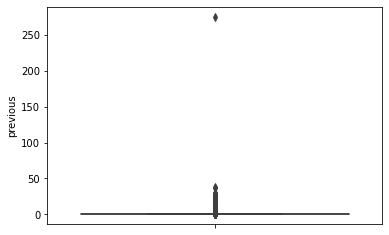

In [11]:
# Llama la atención el máximo de "previous" (Cantidad de contactos previos a esta campania para cada cliente)
# Siendo que hasta el 75% sigue siendo "0", es muy probable que dicho valor sea un outlier
sns.boxplot(data=bank_subscription_df, y='previous')

In [12]:
# Se puede observar que efectivamente, el valor de 275 es un caso aislado y no representativo
# Eliminaremos dicho registro
bank_subscription_df.loc[bank_subscription_df['previous'] == 275]

,age,job,marital_status,education,credit,balance_euros,housing_loan,personal_loan,contact,last_contact_day,last_contact_month,last_contact_duration,campaign,previous,poutcome,subscription
29182,40.0,management,married,tertiary,no,543.0,yes,no,cellular,2,feb,349.0,2,275,other,1


In [13]:
bank_subscription_df.drop(29182, axis=0, inplace=True)

In [14]:
# Verificamos nuevamente por "describe"
bank_subscription_df.describe()

,age,balance_euros,last_contact_day,last_contact_duration,campaign,previous,subscription
count,10742.000000,10742.000000,10742.00000,10742.000000,10742.000000,10742.000000,10742.000000
mean,40.852262,1381.543567,15.81065,262.946379,2.727518,0.555949,1.119345
std,10.537516,3010.810640,8.30650,265.404715,2.992923,1.894869,0.324209
min,18.000000,-6847.000000,1.00000,1.000000,1.000000,0.000000,1.000000
25%,33.000000,76.250000,8.00000,104.000000,1.000000,0.000000,1.000000
50%,39.000000,454.000000,16.00000,180.000000,2.000000,0.000000,1.000000
75%,48.000000,1436.750000,21.00000,326.000000,3.000000,0.000000,1.000000
max,92.000000,64343.000000,31.00000,4918.000000,50.000000,38.000000,2.000000


# 2. Análisis de relaciones

Buscaremos entender un poco mejor la relación que existe entre los datos

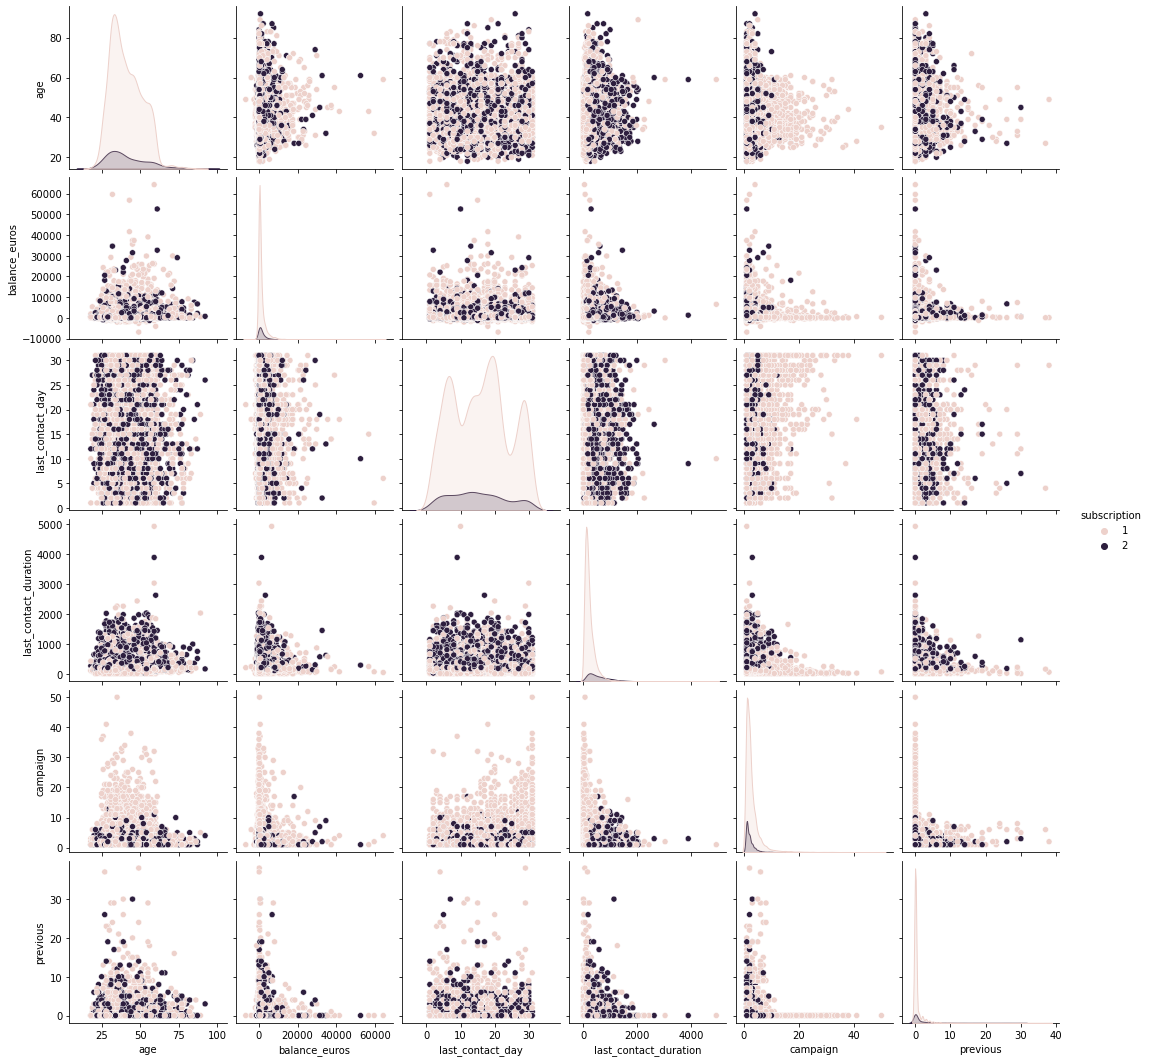

In [15]:
# Haremos una primera visualización cruzada mediante un pairplot coloreado por
# 'subscription' (variable a predecir), de modo de empezar a visualizar las
# relaciones entre las distintas variables numéricas
sns.pairplot(bank_subscription_df, hue='subscription')

<AxesSubplot:>

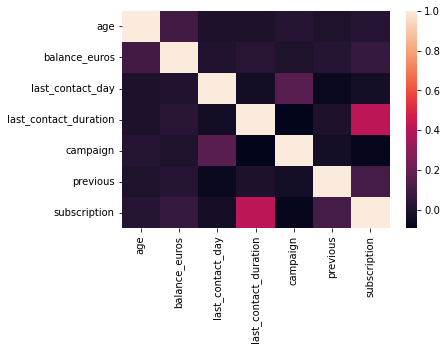

In [16]:
# Visualizaremos también la correlación entre las features numéricas
corr=bank_subscription_df.corr()
sns.heatmap(corr)

<AxesSubplot:xlabel='age', ylabel='Count'>

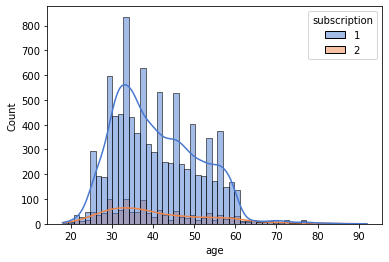

In [17]:
# Procederemos a visualizar features numéricas en histogramas, discriminando
# por estado de "subscription"
sns.histplot(bank_subscription_df, x="age", hue="subscription", kde=True, palette="muted")

<AxesSubplot:xlabel='balance_euros', ylabel='Count'>

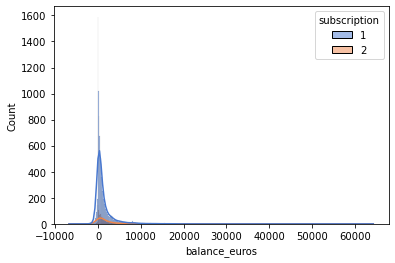

In [18]:
sns.histplot(bank_subscription_df, x="balance_euros", hue="subscription", kde=True, palette="muted")

<AxesSubplot:xlabel='last_contact_duration', ylabel='Count'>

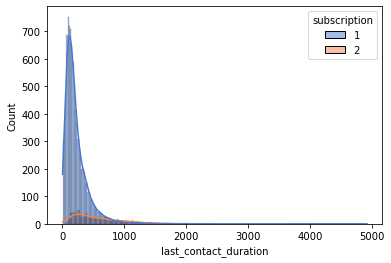

In [19]:
sns.histplot(bank_subscription_df, x="last_contact_duration", hue="subscription", kde=True, palette="muted")

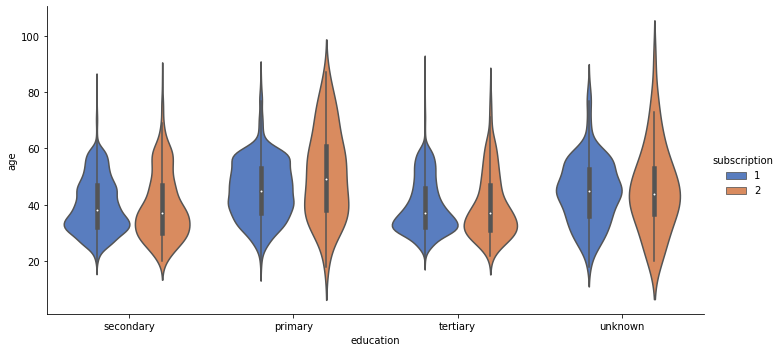

In [20]:
# Finalmente, visualizaremos features numéricas en función de varias categóricas
# de modo de ver si logramos identificar relaciones entre éstas
sns.catplot(data=bank_subscription_df, x="education", y="age", hue="subscription", kind="violin", height=5, aspect=2, palette="muted")

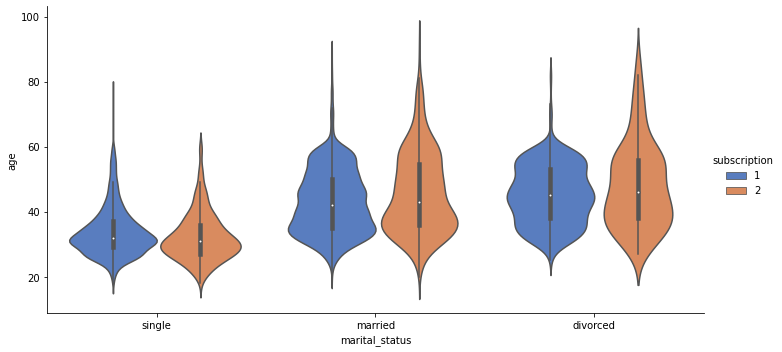

In [21]:
sns.catplot(data=bank_subscription_df, x="marital_status", y="age", hue="subscription", kind="violin", height=5, aspect=2, palette="muted")

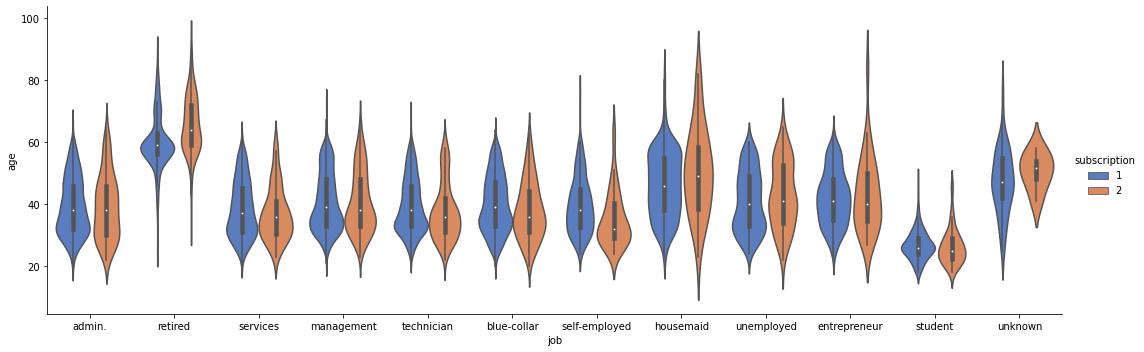

In [22]:
sns.catplot(data=bank_subscription_df, x="job", y="age", hue="subscription", kind="violin", height=5, aspect=3, palette="muted")

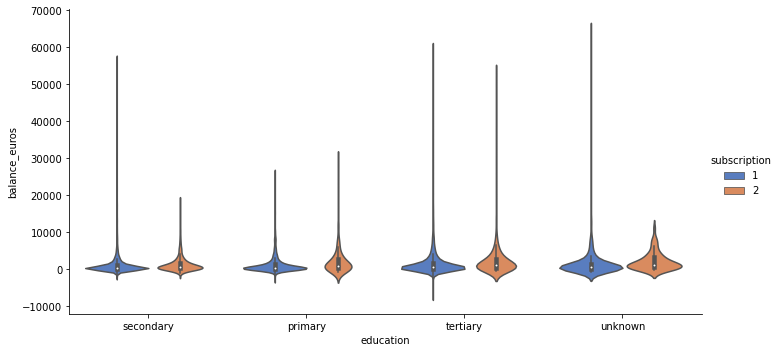

In [23]:
sns.catplot(data=bank_subscription_df, x="education", y="balance_euros", hue="subscription", kind="violin", height=5, aspect=2, palette="muted")

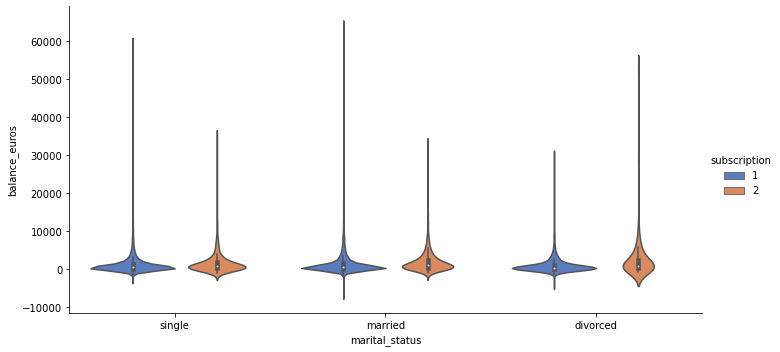

In [24]:
sns.catplot(data=bank_subscription_df, x="marital_status", y="balance_euros", hue="subscription", kind="violin", height=5, aspect=2, palette="muted")

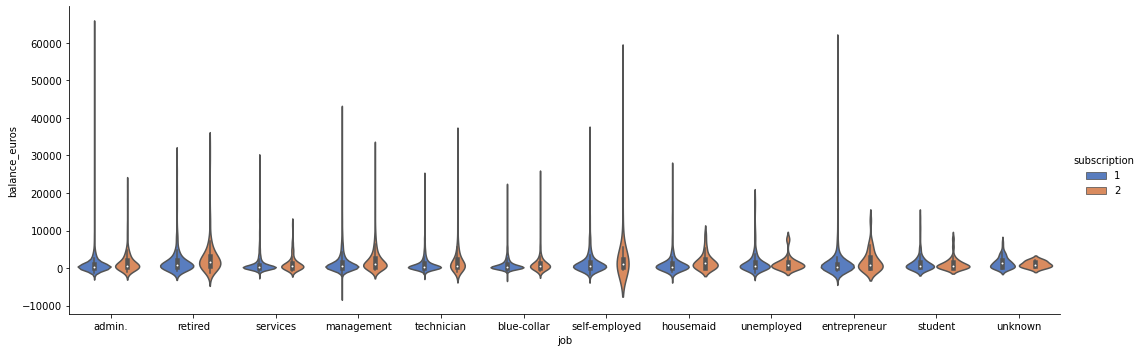

In [25]:
sns.catplot(data=bank_subscription_df, x="job", y="balance_euros", hue="subscription", kind="violin", height=5, aspect=3, palette="muted")

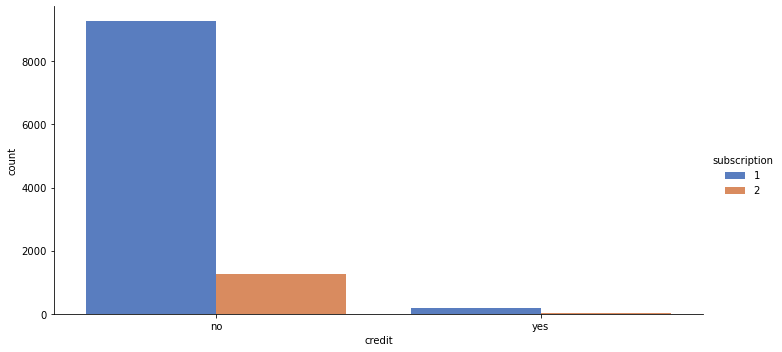

In [26]:
sns.catplot(data=bank_subscription_df, x="credit", hue="subscription", kind="count", height=5, aspect=2, palette="muted")

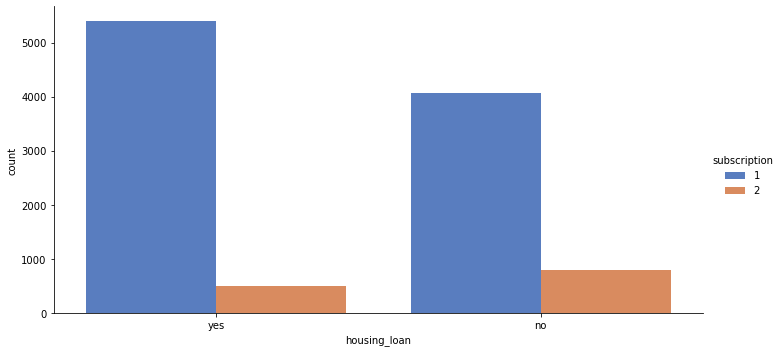

In [27]:
sns.catplot(data=bank_subscription_df, x="housing_loan", hue="subscription", kind="count", height=5, aspect=2, palette="muted")

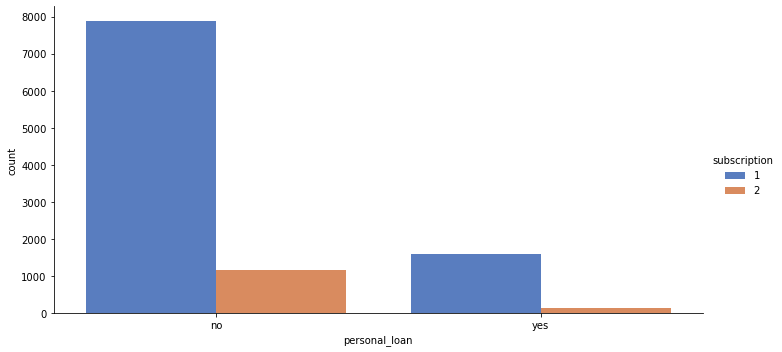

In [28]:
sns.catplot(data=bank_subscription_df, x="personal_loan", hue="subscription", kind="count", height=5, aspect=2, palette="muted")

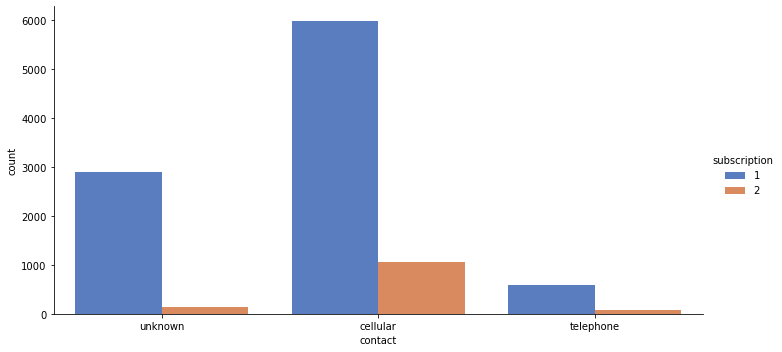

In [29]:
sns.catplot(data=bank_subscription_df, x="contact", hue="subscription", kind="count", height=5, aspect=2, palette="muted")

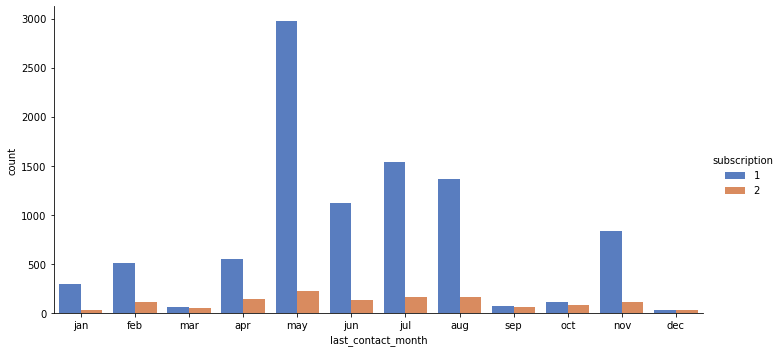

In [30]:
sns.catplot(data=bank_subscription_df, x="last_contact_month", hue="subscription", kind="count", height=5, aspect=2, order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'], palette="muted")

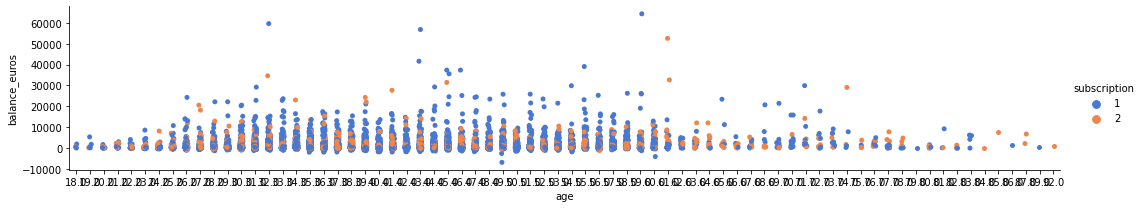

In [31]:
sns.catplot(data=bank_subscription_df, x="age", y="balance_euros", hue="subscription", kind="strip", height=3, aspect=5, palette="muted")